In [19]:
import sys
import os
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from XCrystal import *
import time
import XCrTools as tools

In [20]:


xcr = XCrystal(XCr_path+'/config/Si444.yaml', 12800)
xtools = tools.XCrTools(xcr)


In [21]:
matplotlib.rcParams['figure.figsize'] = (8,7)
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['legend.fontsize'] = 20

In [22]:
def plot_run(data_file, xop_file):
    
    full_run = np.load(data_file)
    XOPdata = np.loadtxt(xop_file)
    XOPdata[:,0] *= 4.848137
    
    min_theta = np.min(XOPdata[:,0])
    max_theta = np.max(XOPdata[:,0])
    
    n_cycle, n_par, n_data = np.shape(full_run)
    RCI_data = np.reshape(full_run, (n_cycle * n_par, n_data))

    print('XOP scan range: ', min_theta,': ', max_theta)
    
    plt.figure()
    
    plt.plot(XOPdata[:,0], XOPdata[:,1], '-', linewidth=2.8, color='red', label='XOP')
    plt.plot(1e6 * RCI_data[:,0], RCI_data[:,1], 'o-', linewidth=2.1, markersize=5, color='b', label='FFT BPM')



    plt.legend(loc=1)

    plt.xlabel(r'$\Delta \theta$ (urad)')
    plt.ylabel('Reflectivity')
    plt.ylim(0.0, 1.1)


In [23]:
def plot_run_group(data_files, xop_files):
    
    def RCI_data(data_file):
        full_run = np.load(data_file)
        n_cycle, n_par, n_data = np.shape(full_run)
        return np.reshape(full_run, (n_cycle * n_par, n_data))
    
    def XOP_data(xop_file):
        XOPdata = np.loadtxt(xop_file)
        XOPdata[:,0] *= 4.848137
        return XOPdata
        
        
        
    matplotlib.rcParams['figure.figsize'] = (12,10)
    matplotlib.rcParams['legend.fontsize'] = 16

    plt.figure()
    
    plt.subplot(2,2,1)
    plt.plot(XOP_data(xop_files[0])[:,0], XOP_data(xop_files[0])[:,1], '-', linewidth=2.8, color='limegreen', label='XOP')
    plt.plot(1e6 * RCI_data(data_files[0])[:,0], RCI_data(data_files[0])[:,1], 'o-', linewidth=2.1, markersize=5, color='b', label='FFT BPM')
    plt.legend(loc=1)
    plt.xlabel(r'$\Delta \theta$ (urad)')
    plt.ylabel('Reflectivity')
    plt.xlim(0, 80)
    plt.ylim(0,1.19)
    
    plt.subplot(2,2,2)
    plt.plot(XOP_data(xop_files[1])[:,0], XOP_data(xop_files[1])[:,1], '-', linewidth=2.8, color='limegreen', label='XOP')
    plt.plot(1e6 * RCI_data(data_files[1])[:,0], RCI_data(data_files[1])[:,1], 'o-', linewidth=2.1, markersize=5, color='b', label='FFT BPM')
    plt.legend(loc=1)
    plt.xlabel(r'$\Delta \theta$ (urad)')
    plt.ylabel('Reflectivity')
    plt.xlim(-3,30)
    plt.ylim(0,1.19)


    
    plt.subplot(2,2,3)
    plt.plot(XOP_data(xop_files[2])[:,0], XOP_data(xop_files[2])[:,1], '-', linewidth=2.8, color='limegreen', label='XOP')
    plt.plot(1e6 * RCI_data(data_files[2])[:,0], RCI_data(data_files[2])[:,1], 'o-', linewidth=2.1, markersize=5, color='b', label='FFT BPM')
    plt.legend(loc=1)
    plt.xlabel(r'$\Delta \theta$ (urad)')
    plt.ylabel('Reflectivity')
    plt.xlim(5,25)
    plt.ylim(0,1.19)

    plt.subplot(2,2,4)
    plt.plot(XOP_data(xop_files[3])[:,0], XOP_data(xop_files[3])[:,1], '-', linewidth=2.8, color='limegreen', label='XOP')
    plt.plot(1e6 * RCI_data(data_files[3])[:,0], RCI_data(data_files[3])[:,1], 'o-', linewidth=2.1, markersize=5, color='b', label='FFT BPM')
    plt.legend(loc=1)
    plt.xlabel(r'$\Delta \theta$ (urad)')
    plt.ylabel('Reflectivity')
    plt.xlim(3,15)
    plt.ylim(0,1.19)
    
    plt.tight_layout()
    plt.savefig('FFT_BPM_comparison.pdf')
    plt.show()

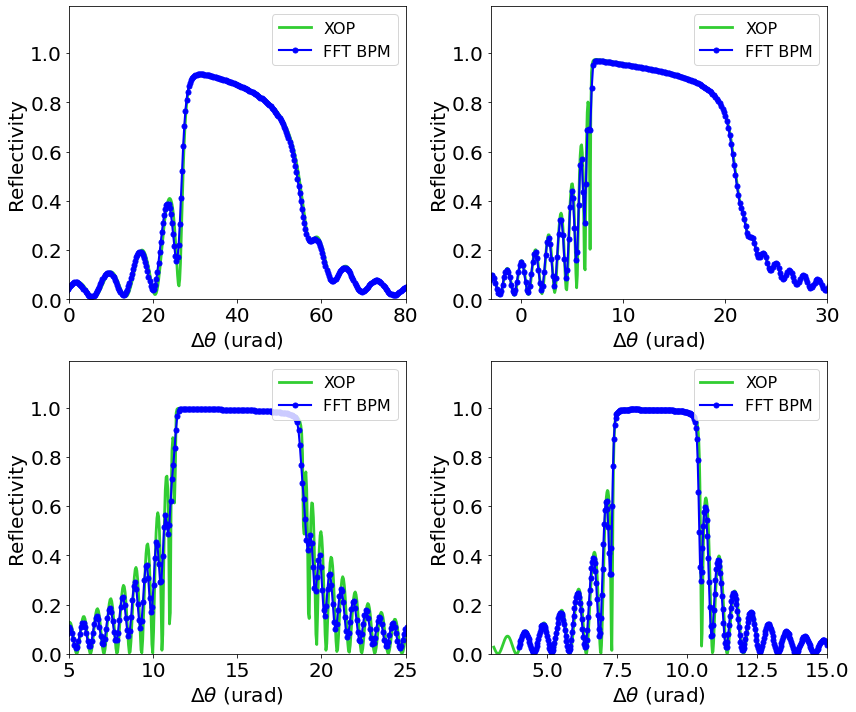

In [24]:
plot_run_group(['run_24_16_angle_Si_444_8048_eV.npy','run_24_16_angle_Si_400_9000_eV.npy','run_24_16_angleC400_9p8keV_waist_250_microns.npy', 'run_24_16_angle_C_333_12800_eV_waist_500um_crystal_thikcness100um.npy'], ['Si444_50um', 'Si4009keVThickness50um','C400_9831_100um', 'C333_12800eV100um'])

In [25]:
# datafile = 'run_50_16_Silicon_004_9000_eV.npy'
# XOPfile = 'Si4009keVThickness50um'

# datafile = 'run_24_16_Diamond_333_12800_eV.npy'
# XOPfile = 'C333_12800_100um_arc'

datafile = 'run_24_16_angleC400_9p8keV_waist_250_microns.npy'
XOPfile = 'C400_9831_100um'

#datafile = 'run_24_16_Silicon_444_8048_eV.npy'
#XOPfile = 'Si444_8048_50um_arc'

XOP scan range:  0.2327323926165 :  30.019227971670002


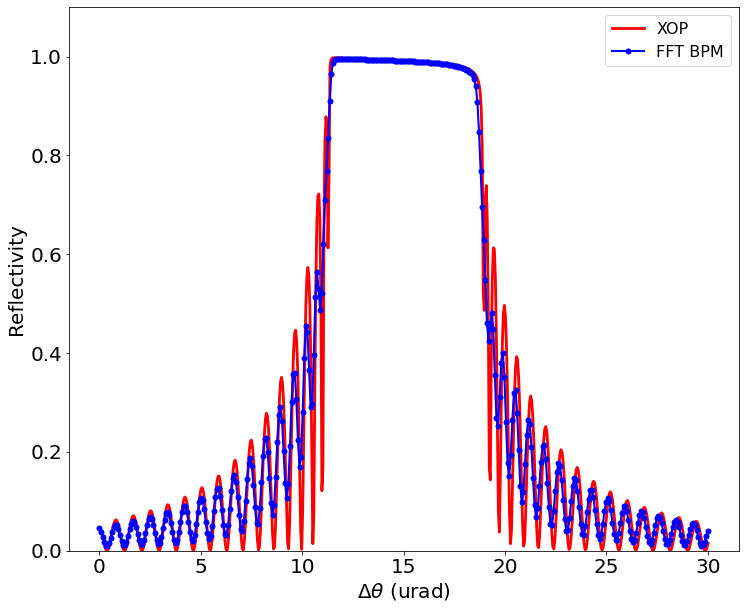

In [26]:
plot_run(datafile, XOPfile)

In [27]:
U1file = 'run_omega_U1_26_16_C333_12800_eVm6p0urad10fstmax1300xgrid2400Corr2waist250zsep100Thickness50um.npy'
U2file = 'run_omega_U2_26_16_C333_12800_eVm6p0urad10fstmax1300xgrid2400Corr2waist250zsep100Thickness50um.npy'

U1_wxyz = np.load(U1file)
U2_wxyz = np.load(U2file)

In [28]:
print(np.shape(U1_wxyz))

(416, 2400, 1, 34)


In [29]:
IJ=33

Text(0, 0.5, '$\\Delta \\omega$ (eV)')

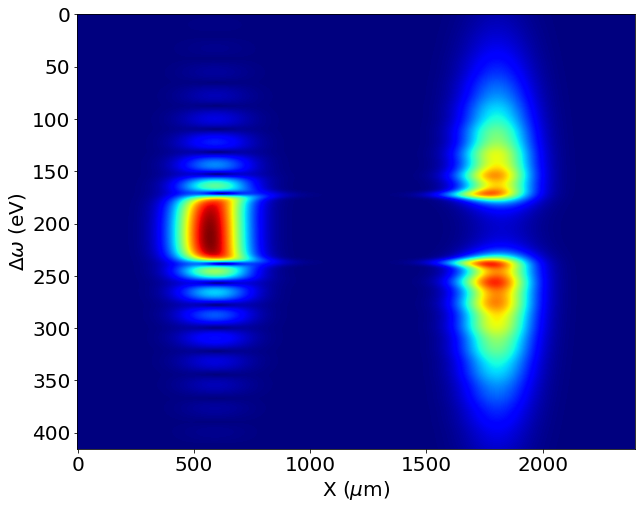

In [30]:
#extent = [0, xcr.xxmax / xcr.convr * 1e6, np.max(w_sim), np.min(w_sim)]
#GnBu
plt.figure(figsize=(10,8))
plt.imshow(np.abs(U1_wxyz[:,:,0,IJ])**1 + np.abs(U2_wxyz[:,:,0,IJ])**1, aspect='auto', cmap='jet')
plt.xlabel(r'X ($\mu$m)')
plt.ylabel(r'$\Delta \omega$ (eV)')
#plt.plot(100*XOPdata[:,1], dw, '-', linewidth=2.1, color='red')
#plt.plot(np.abs(E_wxy_padded[:, 1600, 5])*3e4, w, '-.', color='blue')

#U1_wxyz#plt.ylim(-0.5, 0.5)

In [31]:
U1_wx = U1_wxyz[:, :, 0, IJ]
U2_wx = U2_wxyz[:, :, 0, IJ]

pad_shape = [(0, 0), (0, 0)]
U1_wx_padded = xtools.my_pad(U1_wx, pad_shape)
U2_wx_padded = xtools.my_pad(U2_wx, pad_shape)
#U1_tx = np.fft.fftshift(np.fft.ifft(U1_wx_padded, axis=0), axes=0)
#U2_tx = np.fft.fftshift(np.fft.ifft(U2_wx_padded, axis=0), axes=0)
U1_tx = np.fft.ifft(U1_wx_padded, axis=0)
U2_tx = np.fft.ifft(U2_wx_padded, axis=0)

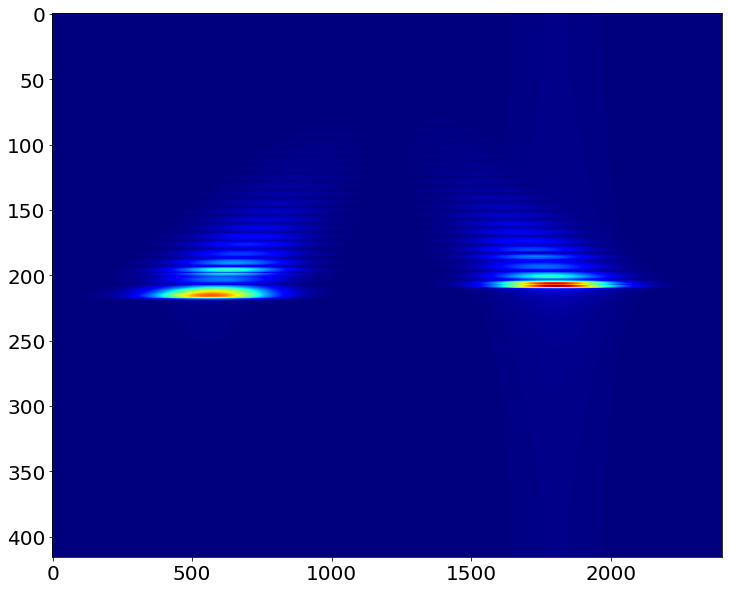

In [32]:
fig, ax = plt.subplots()
ax.imshow(np.abs(U2_tx)**0.6+np.abs(U1_tx)**0.6, aspect='auto', cmap='jet')
ax.set_xlim()
ax.set_ylim()
plt.show()

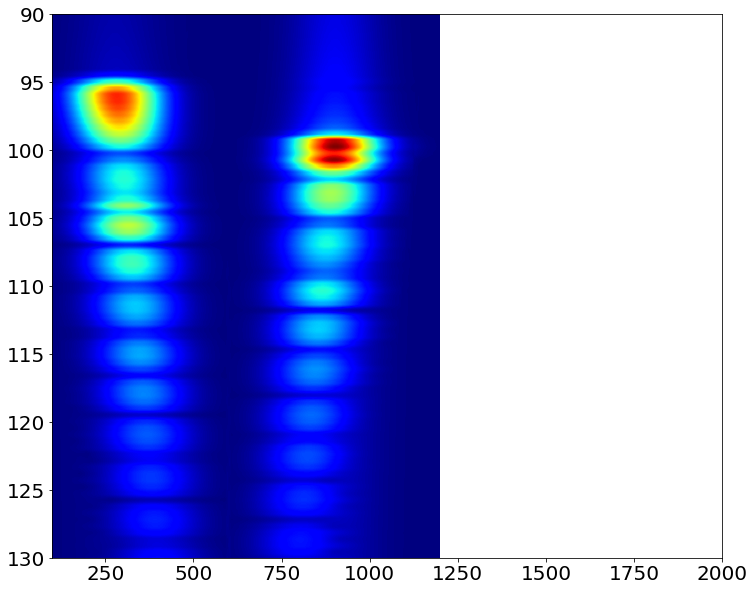

In [33]:
xcr.configure(0)
fig, ax = plt.subplots()
ax.imshow(np.abs(U2_tx)**0.4*1+np.abs(U1_tx)**0.4*1,extent=[0, xcr.xxmax / xcr.convr * 1e6, 0, 200], aspect='auto', cmap='jet')

ax.set_xlim(100,2000)
ax.set_ylim(130, 90)
plt.show()